Case Study on Testing of Hypothesis<br>
A company started to invest in digital marketing as a new way of their product<br>
promotions.For that they collected data and decided to carry out a study on it.<br>
● The company wishes to clarify whether there is any increase in sales after<br>
stepping into digital marketing.<br>
● The company needs to check whether there is any dependency between the<br>
features “Region” and “Manager”.<br>
Help the company to carry out their study with the help of data provided.<br>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st 
import statsmodels.api as sm
import pylab as py


In [2]:
#Step1: Import data 
salesdata = pd.read_csv('Sales_add.csv')

In [3]:
#Step2: Undestand the data and check for null values 
salesdata.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [5]:
salesdata.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [6]:
#Step 3: Define the hypothesis
# Null hypothesis H0 is that there is no increase in sales because of digital marketing. 
#ie. d = Mu1 - Mu2 = 0

#Alternative hypothesis is that sales have increased because of digital marketing.
#i.e d = Mu1 - Mu2 < 0 

#Step 4:
#Decide on the alpha value (or α value). This involves determining the risk you are willing to take of 
#drawing the wrong conclusion. For example, suppose you set α=0.05 when comparing two independent groups. 
#Here, I have decided on a 5% risk of concluding the unknown population means are different when they are not.


In [7]:
#Step 5: 
#Check the assumptions for paired t-test.
#In order for the paired sample t-test results to be trusted, the following assumptions need to be met:
#1.The dependent variable must be continuous which is measured on an interval or ratio scale
   #Since its monthly sale's data, data is continuous and measured on an interval scale
# 2. Observations are randomly selected 
# 3. The observations are independent
# 4. The dependent variable should be approximately normally distributed.
   #The paired sample t-test is robust to this violation. If there is a violation of normality, 
   #as long as it’s not in a major violation the test results can be considered valid
# 5.The dependent variable should not contain any significant outliers
#If any of these assumptions are violated, a different test should be used. 
#An alternative to the paired sample t-test is the Wilcoxon signed-rank Test

<AxesSubplot:>

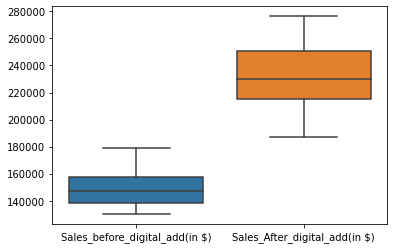

In [8]:
#Checking for outliers

sns.boxplot(data=salesdata[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']])


There doesn’t appear to be any significant outliers in the variables. <br>
Next we will see if the observations are normally distributed. 


Text(0, 0.5, 'Frequency')

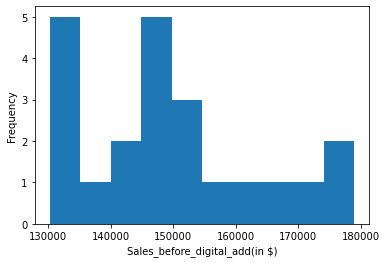

In [9]:
plt.hist(salesdata['Sales_before_digital_add(in $)'])
plt.xlabel('Sales_before_digital_add(in $)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

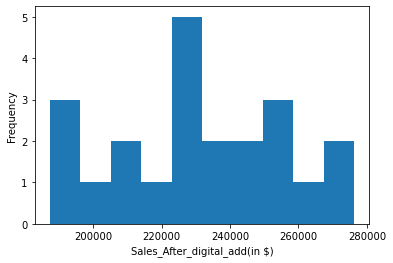

In [10]:
plt.hist(salesdata['Sales_After_digital_add(in $)'])
plt.xlabel('Sales_After_digital_add(in $)')
plt.ylabel('Frequency')

The histograms of our data does not seem to be normally distributed. <br>
Let’s test this statistically to see if the data is normally distributed.<br>
To test this, one can use the Shapiro-Wilk test for normality. <br>

In [11]:
#Perform the Shapiro-Wilk test for normality.
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
#The first value is the W test value, and the second value it the p-value.
#If the p value of the Shapiro-Wilk Test is greater than 0.05, the data is normal.
#If it is below 0.05, the data significantly deviate from a normal distribution.

st.shapiro(salesdata['Sales_before_digital_add(in $)'])

ShapiroResult(statistic=0.9306764006614685, pvalue=0.12674309313297272)

In [12]:
st.shapiro(salesdata['Sales_After_digital_add(in $)'])

ShapiroResult(statistic=0.9702125191688538, pvalue=0.7159563302993774)

Since both the p values are greater than 0.05, we can conculde that the data is normal. <br>
Now that all the assumptions and conditions for paired sample t-test are met, we can proceed. <br>

In [23]:
# using st.ttest_rel to test pair sample t test
t_value, one_tailed_p_value = st.ttest_rel(salesdata['Sales_before_digital_add(in $)'], salesdata['Sales_After_digital_add(in $)'],alternative = 'less')

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one_tailed_test is',one_tailed_p_value)

alpha = 0.05

if one_tailed_p_value<=alpha:

    print('Conclusion','\n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 

So we conclude that there is increase in sales because of digital marketing. i.e., d < 0 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','\n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We fail to reject the null hypothesis H0. 

So we conclude that sales have not increased because of digital marketing. i.e., d = 0 at %.2f level of significance.'''%alpha)

Test statistic is -12.090705
p-value for one_tailed_test is 3.168333502287889e-11
Conclusion 
 Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. 

So we conclude that there is increase in sales because of digital marketing. i.e., d < 0 at 0.05 level of significance.


In [14]:
#Now Lets check if there is dependency between varibale. Region and Manager 
#Region and Manager are Categorical variables. 
#Chi-Square test is a statistical test which is used to find out the difference between the observed and 
#the expected data. 
#We can also use this test to find the correlation between categorical variables in our data. 
#The purpose of this test is to determine if the difference between 2 categorical variables is due to chance,
#or if it is due to a relationship between them.

#Conduct the test we have to conduct 2 hypothesis. 
#Null Hypothesis H0 -  There is no relationship between the variables Region and Manager 
#Alternative Hypotheis H1 -  There is relationship between variables Region and Manager 

#If the p-value obtained after conducting the test is less than 0.05 we reject the Null hypothesis
#and accept the Alternate hypothesis 
#If the p-value is greater that 0.05 we fail to reject the Null hypothesis.

In [15]:
crosstab = pd.crosstab(salesdata['Region'],salesdata['Manager'],margins=True)
print(crosstab)

Manager     Manager - A  Manager - B  Manager - C  All
Region                                                
Region - A            4            3            3   10
Region - B            4            1            2    7
Region - C            1            3            1    5
All                   9            7            6   22


In [16]:
value = crosstab.iloc[0:3,0:3] #observations without totals 
#using st.chi2_contigency()
test_value,p_value,dof = st.chi2_contingency(value)[0:3]
print('Statistical value = ', test_value )
print('p value = ', p_value )
print('Degrees of freedom = ', dof ) #(3-1)*(3-1)
if  p_value < 0.05:
    print('The p-value < 0.05 we reject the Null hypothesis and accept the Alternate hypothesis','\n',
          'There is dependency between variables region and manager')
else:
    print('The p-value > 0.05 we fail to reject the Null hypothesis','\n',
          'There is no dependency between variables region and manager')
    

Statistical value =  3.050566893424036
p value =  0.5493991051158094
Degrees of freedom =  4
The p-value > 0.05 we fail to reject the Null hypothesis 
 There is no dependency between variables region and manager
